In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import string 
import re
from scipy import spatial
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag
import os
from sklearn.naive_bayes import GaussianNB
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install transformers==4.1.1 sentencepiece==0.1.94
!pip install mosestokenizer==1.1.0

     |████████████████████████████████| 1.5 MB 14.7 MB/s 
     |████████████████████████████████| 1.1 MB 42.0 MB/s 
     |████████████████████████████████| 2.9 MB 53.0 MB/s 
     |████████████████████████████████| 895 kB 62.0 MB/s 
  Created wheel for mosestokenizer: filename=mosestokenizer-1.1.0-py3-none-any.whl size=49117 sha256=0dd50b7474e4725452e5e9fac55a47d8826965989ec1701b8d78758dd41e20d7
  Stored in directory: /root/.cache/pip/wheels/a7/31/94/fef279382208e85a65c1a7f5c4d0020115477b0af74f296b57
  Created wheel for toolwrapper: filename=toolwrapper-2.1.0-py3-none-any.whl size=3354 sha256=55482dc44c781e114d90b05089aabdc835668e75f831945c578e973628f811ee
  Stored in directory: /root/.cache/pip/wheels/c5/4f/33/54741ffe08e38ececb1d28068a153729b4fe820bafa0a0691f
  Created wheel for uctools: filename=uctools-1.3.0-py3-none-any.whl size=6163 sha256=ec92e0c58df39a642754f2bd7c19e9321f548d59c3a811d6a92bc7f087e53cc9
  Stored in directory: /root/.cache/pip/wheels/fb/44/e9/914cf8fa71f0141f9314f8

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

In [ ]:
target_model_name = 'Helsinki-NLP/opus-mt-en-ROMANCE'
target_tokenizer = MarianTokenizer.from_pretrained(target_model_name)
target_model = MarianMTModel.from_pretrained(target_model_name)

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/799k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/312M [00:00<?, ?B/s]

Some weights of MarianMTModel were not initialized from the model checkpoint at Helsinki-NLP/opus-mt-en-ROMANCE and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
en_model_name = 'Helsinki-NLP/opus-mt-ROMANCE-en'
en_tokenizer = MarianTokenizer.from_pretrained(en_model_name)
en_model = MarianMTModel.from_pretrained(en_model_name)

Downloading:   0%|          | 0.00/800k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/312M [00:00<?, ?B/s]

Some weights of MarianMTModel were not initialized from the model checkpoint at Helsinki-NLP/opus-mt-ROMANCE-en and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def translate(texts, model, tokenizer, language="fr"):
    # Prepare the text data into appropriate format for the model
    template = lambda text: f"{text}" if language == "en" else f">>{language}<< {text}"
    src_texts = [template(text) for text in texts]
    src_texts = np.array(src_texts)
    # Tokenize the texts
    encoded = tokenizer.prepare_seq2seq_batch(src_texts,return_tensors='pt')
    
    # Generate translation using model
    translated = model.generate(**encoded)

    # Convert the generated tokens indices back into text
    translated_texts = tokenizer.batch_decode(translated, skip_special_tokens=True)
    
    return translated_texts

In [ ]:
def back_translate(texts, source_lang="en", target_lang="fr"):
    # Translate from source to target language
    fr_texts = translate(texts, target_model, target_tokenizer, 
                         language=target_lang)

    # Translate from target language back to source language
    back_translated_texts = translate(fr_texts, en_model, en_tokenizer, 
                                      language=source_lang)
    
    return back_translated_texts

In [ ]:
en_texts = ['This is so cool', 'I hated the food', 'They were very helpful']
aug_texts = back_translate(np.array(en_texts), source_lang="en", target_lang="fr")
print(aug_texts)

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1065: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


["It's so cool.", 'I hated food.', "They've been very helpful."]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('IMDB Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
X_text=df["review"]

In [ ]:
X_text

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
X_text[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
X_text=X_text[:200]

In [ ]:
for i in range(200):
  X_text[i]=X_text[i].split('.')

In [ ]:
for i in range(200):
  X_t=[]
  for s in X_text[i]:
    if s != '':
      X_t.append(s)
  X_text[i]=X_t


In [ ]:
X_text[0]

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked",
 ' They are right, as this is exactly what happened with me',
 '<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO',
 ' Trust me, this is not a show for the faint hearted or timid',
 ' This show pulls no punches with regards to drugs, sex or violence',
 ' Its is hardcore, in the classic use of the word',
 '<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary',
 ' It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda',
 ' Em City is home to many',
 'Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more',
 'so scuffles, death stares, dodgy dealings and shady agreements are never far away',
 "<br /><br />I would say the

In [ ]:
X_augmented=[]
count=1
for text in X_text:
  aug_texts = back_translate(np.array(text), source_lang="en", target_lang="fr")
  X_augmented.append(aug_texts)
  print(count)
  count+=1
  #print(aug_texts)

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1065: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [ ]:
temp=X_augmented
temp2=X_augmented
temp3=X_augmented
temp4=X_augmented

In [ ]:
temp5=[]
for i in range(200):
    s=X_augmented[i][0]
    for j in range(1,len(X_augmented[i])):
        s=s+'.'+X_augmented[i][j]
    temp5.append(s)

In [ ]:
temp6=df['review']

In [ ]:
temp6=temp6[:200]

In [ ]:
temp5[0]

"One of the other critics mentioned that after watching only 1 Oz episode you will be hung.They're right, because that's exactly what happened to me..The first thing that struck me about Oz was his brutality and the constant scenes of violence, which started from the word GO.Believe me, it's not a show for weak or shy hearts..This show does not shoot punches with regard to drugs, sex or violence.Its hardcore, in the classic use of the word.<br /><br />It is called OZ as it is the nickname given to the prison of the maximum security state of Oswald.It focuses mainly on Emerald City, an experimental section of the prison where all cells have a glass front and face, so privacy is not at the forefront of the agenda.Em City is the home of many.Aryans, Muslims, gangsters, Latinos, Christians, Italians, Irish and more.So the quarrels, the looks of death, the transactions and the shady agreements are never far away.I would say that the main attraction of the show is that it goes where other sh

In [ ]:
temp6[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
listt=[]
for i in range(200):
    listt.append([temp5[i],temp6[i]])

In [ ]:
df2=pd.DataFrame(listt,columns=['Text','Augmented Text'])

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Prism/Augmented_text.csv')

In [ ]:
df2=df2.append(df1)

In [ ]:
df2.head()

,Text,Augmented Text,Unnamed: 0
0,One of the other critics mentioned that after ...,One of the other reviewers has mentioned that ...,NaN
1,A beautiful small production.<br /><br />The f...,A wonderful little production. <br /><br />The...,NaN
2,I thought it was a wonderful way to spend time...,I thought this was a wonderful way to spend ti...,NaN
3,Basically there's a family where a little boy ...,Basically there's a family where a little boy ...,NaN
4,"""Love in the Time of Money"" by Petter Mattei i...","Petter Mattei's ""Love in the Time of Money"" is...",NaN


In [ ]:
df2.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df2.tail()

,Text,Augmented Text
45,I've seen this movie at least 100 times and I'...,I have seen this film at least 100 times and I...
46,This show doesn't make any sense at all..Every...,This show makes absolutely no sense. Every wee...
47,This movie was so bad that it was funny! For a...,This movie was so bad it was funny! For awhile...
48,"Meryl Streep is a genius..Well, at least as an...","Meryl Streep is such a genius. Well, at least ..."
49,'Airport 4' is basically an inclined disorder ...,'Airport 4' is basically a slopped together me...


In [1]:
df2.to_csv('/content/drive/MyDrive/Prism/Augmented_text2.csv',index=False)

NameError: ignored

In [ ]:
df2=pd.read_csv('Augmented_text2.csv')

In [ ]:
df2.head()

,Text,Augmented Text
0,One of the other critics mentioned that after ...,One of the other reviewers has mentioned that ...
1,A beautiful small production.<br /><br />The f...,A wonderful little production. <br /><br />The...
2,I thought it was a wonderful way to spend time...,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,Basically there's a family where a little boy ...
4,"""Love in the Time of Money"" by Petter Mattei i...","Petter Mattei's ""Love in the Time of Money"" is..."


In [ ]:
X_text=df2['Text']

In [ ]:
X_text[0]

"One of the other critics mentioned that after watching only 1 Oz episode you will be hung.They're right, because that's exactly what happened to me..The first thing that struck me about Oz was his brutality and the constant scenes of violence, which started from the word GO.Believe me, it's not a show for weak or shy hearts..This show does not shoot punches with regard to drugs, sex or violence.Its hardcore, in the classic use of the word.<br /><br />It is called OZ as it is the nickname given to the prison of the maximum security state of Oswald.It focuses mainly on Emerald City, an experimental section of the prison where all cells have a glass front and face, so privacy is not at the forefront of the agenda.Em City is the home of many.Aryans, Muslims, gangsters, Latinos, Christians, Italians, Irish and more.So the quarrels, the looks of death, the transactions and the shady agreements are never far away.I would say that the main attraction of the show is that it goes where other sh

In [ ]:
X_augmented=df2['Augmented Text']

In [ ]:
X_augmented_train=X_augmented

In [ ]:
X_augmented[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
augmented=[]
y_train=[]
y_augmented_train=[]
for i in range(250):
    augmented.append(X_text[i])
    augmented.append(X_augmented_train[i])
    if df['sentiment'][i]=='positive':
        y_train.append(1)
        y_augmented_train.append(1)
        y_augmented_train.append(1)
    else:
        y_train.append(0)
        y_augmented_train.append(0)
        y_augmented_train.append(0)

In [ ]:
en_stopwords=set(stopwords.words('english'))
wn = nltk.WordNetLemmatizer()

In [ ]:
def getCleanedReview(review):
    review=review.lower()
    text_lc = "".join([word.lower() for word in review if word not in string.punctuation])
    #print(text_lc)
    text_rc=re.sub('[0-9]+',' ',text_lc)
    #tokenize
    tokens=word_tokenize(text_rc,language='english')
    #print(tokens)
    new_tokens=[token for token in tokens if token not in en_stopwords]
    #print(new_tokens)
    lemmatized_tokens=[wn.lemmatize(token) for token in new_tokens]
    return lemmatized_tokens

In [ ]:
original=[]
y_augmented=[]
X_train=[]
X_augmented_train=[]
y=df['sentiment']

In [ ]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [ ]:
for i in range(len(X_text)):
    X_train.append(getCleanedReview(X_text[i]))
    if y[i] == 'positive':
        original.append(1)
        y_augmented.append(1)
        y_augmented.append(1)
    else:
        original.append(0)
        y_augmented.append(0)
        y_augmented.append(0)

In [ ]:
len(y_augmented)

500

In [ ]:
len(augmented)

500

In [ ]:
for i in range(len(augmented)):
    X_augmented_train.append(getCleanedReview(augmented[i]))

In [ ]:
len(X_augmented_train)

500

In [ ]:
df_new=[]
df_new=pd.DataFrame(df_new)

In [ ]:
df_new["cleaned_review"]=X_train
X_train=df_new["cleaned_review"]

In [ ]:
df_new_=[]
df_new_=pd.DataFrame(df_new_)
df_new_["cleaned_augmented_review"]=X_augmented_train
X_augmented_train=df_new_["cleaned_augmented_review"]

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [ ]:
X_train.dropna()
cvt = CountVectorizer(analyzer=getCleanedReview,max_features=5000)
X_v = cvt.fit_transform(X_train.apply(lambda x: np.str_(x)))
X_augmented_v=cvt.fit_transform(X_augmented_train.apply(lambda x: np.str_(x)))

In [ ]:
y_train=np.array(original)
y_augmented=np.array(y_augmented)

In [ ]:
gnb=GaussianNB()
X_v=X_v.toarray()
X_augmented_v=X_augmented_v.toarray()
gnb.fit(X_v,y_train)

GaussianNB()

In [ ]:
gnb2=GaussianNB()
gnb2.fit(X_augmented_v,y_augmented)

GaussianNB()

In [ ]:
X_test=df['review'].iloc[25000:25600]
y_test=df['sentiment'].iloc[25000:25600]

In [ ]:
X_test=X_test.values.tolist()

In [ ]:
X_test_new=[]
y_test_new=[]

In [ ]:
for i in range(len(X_test)):
    X_test_new.append(getCleanedReview(X_test[i]))
    if y_test[25000+i] == 'positive':
        y_test_new.append(1)
    else:
        y_test_new.append(0)

In [ ]:
df_test=pd.DataFrame()

In [ ]:

df_test["cleaned_test_review"]=X_test_new
X_test=df_test["cleaned_test_review"]

In [ ]:
X_test.dropna()
cvt1 = CountVectorizer(analyzer=getCleanedReview,max_features=5000)
X_test_v = cvt1.fit_transform(X_test.apply(lambda x: np.str_(x)))

In [ ]:
y_test=np.array(y_test_new)

In [ ]:
X_test_v=X_test_v.toarray()

In [ ]:
gnb.score(X_test_v,y_test)

0.48833333333333334

In [ ]:
gnb2.score(X_test_v,y_test)

0.5216666666666666

dict_values([575014, 310319, 138258, 120982, 94926, 89972, 86608, 84962, 83094, 78689, 69066, 62137, 57806, 55445, 54736, 54723, 48753, 42478, 40713, 38781, 38720, 38649, 33724, 33712, 33392, 32894, 32827, 29525, 28542, 28531, 28309, 27419, 26412, 25965, 25669, 25544, 25317, 24547, 24326, 23186, 22799, 22377, 22333, 22240, 22177, 22070, 21802, 21766, 21748, 21004, 19260, 18744, 18285, 18102, 17969, 17762, 17485, 17466, 17444, 17357, 17295, 16828, 16796, 15968, 15949, 15942, 15710, 15669, 15294, 15292, 15258, 15179, 14906, 14660, 14634, 14595, 14419, 14269, 14244, 14044, 13789, 13499, 13430, 13288, 13267, 12927, 12704, 12636, 12590, 12563, 12492, 12346, 12235, 12205, 12155, 12057, 11917, 11916, 11872, 11834, 11795, 11718, 11674, 11589, 11526, 11200, 11185, 11041, 10874, 10736, 10633, 10374, 9813, 9783, 9767, 9745, 9664, 9597, 9477, 9334, 9280, 9052, 8839, 8813, 8789, 8776, 8677, 8622, 8521, 8520, 8490, 8257, 8217, 8156, 8048, 7987, 7956, 7918, 7902, 7871, 7822, 7812, 7748, 7746, 7680, 7

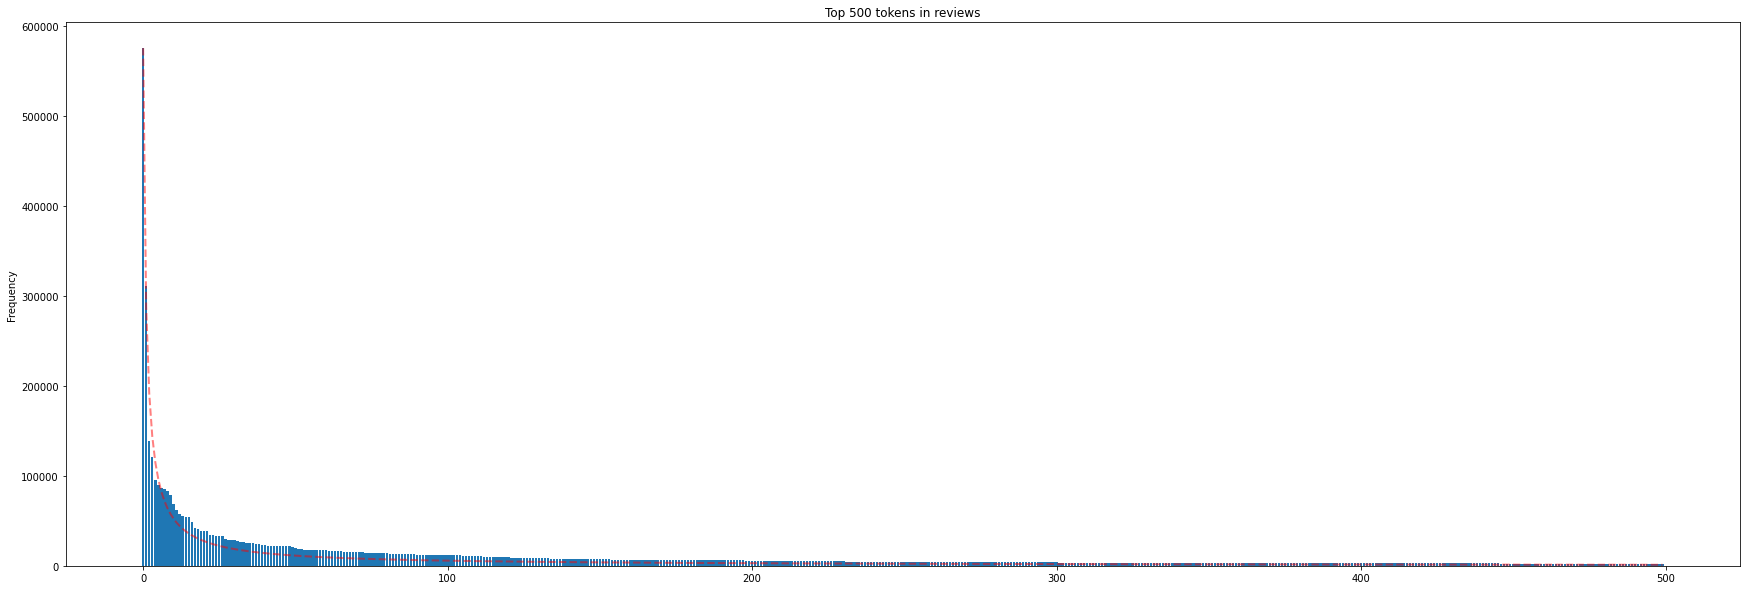

In [23]:
import re
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy import special
import numpy as np
import operator
import itertools
from itertools import islice
#Get our corpus of medical words
frequency = {}
open_file = open('/content/drive/MyDrive/PRISM/IMDB Dataset.csv', 'r')
file_to_string = open_file.read()
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', file_to_string)

#build dict of words based on frequency
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1

frequency = dict( sorted(frequency.items(), key=operator.itemgetter(1),reverse=True))

#limit words to 1000
n = 500
#frequency = {key:value for key,value in frequency.items()[0:n]}
frequency = dict(itertools.islice(frequency.items(), n))  
#convert value of frequency to numpy array
s = frequency.values()
s = np.array(s)
print(s)
y_pos = np.arange(500)
e=1
expected_zipf = [575014/(i+1)**e for i in y_pos]
# #Calculate zipf and plot the data
a = 100. #  distribution parameter
plt.figure(figsize=(30,10))
plt.bar(y_pos, frequency.values())
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in reviews')
plt.show()

In [5]:
print(s)

dict_values([575014, 310319, 138258, 120982, 94926, 89972, 86608, 84962, 83094, 78689, 69066, 62137, 57806, 55445, 54736, 54723, 48753, 42478, 40713, 38781, 38720, 38649, 33724, 33712, 33392, 32894, 32827, 29525, 28542, 28531, 28309, 27419, 26412, 25965, 25669, 25544, 25317, 24547, 24326, 23186, 22799, 22377, 22333, 22240, 22177, 22070, 21802, 21766, 21748, 21004, 19260, 18744, 18285, 18102, 17969, 17762, 17485, 17466, 17444, 17357, 17295, 16828, 16796, 15968, 15949, 15942, 15710, 15669, 15294, 15292, 15258, 15179, 14906, 14660, 14634, 14595, 14419, 14269, 14244, 14044, 13789, 13499, 13430, 13288, 13267, 12927, 12704, 12636, 12590, 12563, 12492, 12346, 12235, 12205, 12155, 12057, 11917, 11916, 11872, 11834, 11795, 11718, 11674, 11589, 11526, 11200, 11185, 11041, 10874, 10736, 10633, 10374, 9813, 9783, 9767, 9745, 9664, 9597, 9477, 9334, 9280, 9052, 8839, 8813, 8789, 8776, 8677, 8622, 8521, 8520, 8490, 8257, 8217, 8156, 8048, 7987, 7956, 7918, 7902, 7871, 7822, 7812, 7748, 7746, 7680, 7

In [12]:
import pandas as pd

import re
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy import special
import numpy as np
import operator
import itertools
from itertools import islice
#Get our corpus of medical words
frequency = {}
open_file = open('/content/drive/MyDrive/PRISM/IMDB Dataset.csv', 'r')
file_to_string = open_file.read()
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', file_to_string)

#build dict of words based on frequency
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1

frequency = dict( sorted(frequency.items(), key=operator.itemgetter(1),reverse=True))

#limit words to 1000
n = 500
#frequency = {key:value for key,value in frequency.items()[0:n]}
frequency = dict(itertools.islice(frequency.items(), n)) 
df=pd.DataFrame()
df['total']=np.array(frequency.values)

In [18]:
print(frequency.values)

<built-in method values of dict object at 0x7efcedcdb690>


In [29]:
i=0
print("Rank","Word","Frequency",sep='\t\t')
for key,value in frequency.items():
  print(i+1,key,value,sep='\t\t')
  i=i+1

Rank		Word		Frequency
1		the		575014
2		and		310319
3		that		138258
4		this		120982
5		was		94926
6		The		89972
7		movie		86608
8		with		84962
9		for		83094
10		film		78689
11		but		69066
12		you		62137
13		are		57806
14		not		55445
15		have		54736
16		his		54723
17		one		48753
18		all		42478
19		who		40713
20		they		38781
21		from		38720
22		like		38649
23		about		33724
24		out		33712
25		her		33392
26		just		32894
27		has		32827
28		This		29525
29		some		28542
30		good		28531
31		can		28309
32		more		27419
33		very		26412
34		positive		25965
35		negative		25669
36		what		25544
37		there		25317
38		time		24547
39		would		24326
40		when		23186
41		which		22799
42		story		22377
43		really		22333
44		see		22240
45		only		22177
46		their		22070
47		she		21802
48		even		21766
49		had		21748
50		were		21004
51		than		19260
52		much		18744
53		been		18285
54		well		18102
55		get		17969
56		into		17762
57		him		17485
58		other		17466
59		bad		17444
60		will		17357
61		people		17295
62		becaus